In [1]:
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, Dropout
from keras.layers import LSTM, SimpleRNN
from keras.datasets import imdb
import pandas as pd
from matplotlib import pyplot as plt
from tqdm import tqdm

2022-12-04 18:28:21.610889: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-04 18:28:21.749536: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-04 18:28:21.749559: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-04 18:28:21.777301: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-12-04 18:28:22.329840: W tensorflow/stream_executor/platform/de

In [2]:
max_features = 20000
batch_size = 32
max_len = 80

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

In [3]:
model_layers_dict = {}
for neurons in [8, 16, 32, 64, 128]:
    model_layers_dict[neurons] = [
        Embedding(max_features, 16),
        SimpleRNN(neurons, input_shape=(max_features,max_len)),
        Dense(1, activation='sigmoid'),
    ]

models = {}

for k, v in model_layers_dict.items():
    model = Sequential(v)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])
    models[k] = model
    print(k)
    model.summary()

8
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 8)                 200       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 320,209
Trainable params: 320,209
Non-trainable params: 0
_________________________________________________________________
16
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 16)          320000    
                                                                 
 simple_rnn_1 (SimpleRN

2022-12-04 18:28:26.130751: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-04 18:28:26.130772: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-04 18:28:26.130789: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (kamilasproska-VivoBook-ASUSLaptop-X515UA-M515UA): /proc/driver/nvidia/version does not exist
2022-12-04 18:28:26.130991: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Trainable params: 320,545
Non-trainable params: 0
_________________________________________________________________
32
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 16)          320000    
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 32)                1568      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 321,601
Trainable params: 321,601
Non-trainable params: 0
_________________________________________________________________
64
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 

In [4]:
history_dict = {}
for k, model in tqdm(models.items()):
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=5, validation_data=(x_test, y_test))
    history_dict[k] = history

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1/5
782/782 [==============================] - 18s 21ms/step - loss: 0.5659 - accuracy: 0.6962 - val_loss: 0.4437 - val_accuracy: 0.8059
Epoch 2/5
782/782 [==============================] - 16s 20ms/step - loss: 0.3348 - accuracy: 0.8638 - val_loss: 0.4050 - val_accuracy: 0.8283
Epoch 3/5
782/782 [==============================] - 16s 20ms/step - loss: 0.2180 - accuracy: 0.9195 - val_loss: 0.4435 - val_accuracy: 0.8225
Epoch 4/5
782/782 [==============================] - 16s 21ms/step - loss: 0.1346 - accuracy: 0.9554 - val_loss: 0.4906 - val_accuracy: 0.8175
Epoch 5/5
782/782 [==============================] - 16s 21ms/step - loss: 0.0896 - accuracy: 0.9728 - val_loss: 0.5583 - val_accuracy: 0.8115


 20%|██        | 1/5 [01:21<05:27, 81.77s/it]

Epoch 1/5
782/782 [==============================] - 17s 21ms/step - loss: 0.5785 - accuracy: 0.6812 - val_loss: 0.4593 - val_accuracy: 0.7920
Epoch 2/5
782/782 [==============================] - 16s 21ms/step - loss: 0.3450 - accuracy: 0.8565 - val_loss: 0.4106 - val_accuracy: 0.8200
Epoch 3/5
782/782 [==============================] - 16s 20ms/step - loss: 0.2088 - accuracy: 0.9237 - val_loss: 0.4649 - val_accuracy: 0.8017
Epoch 4/5
782/782 [==============================] - 17s 22ms/step - loss: 0.1042 - accuracy: 0.9665 - val_loss: 0.5551 - val_accuracy: 0.8013
Epoch 5/5
782/782 [==============================] - 17s 22ms/step - loss: 0.0521 - accuracy: 0.9852 - val_loss: 0.6721 - val_accuracy: 0.7783


 40%|████      | 2/5 [02:45<04:09, 83.02s/it]

Epoch 1/5
782/782 [==============================] - 18s 22ms/step - loss: 0.4770 - accuracy: 0.7675 - val_loss: 0.3859 - val_accuracy: 0.8350
Epoch 2/5
782/782 [==============================] - 17s 22ms/step - loss: 0.2987 - accuracy: 0.8812 - val_loss: 0.3980 - val_accuracy: 0.8294
Epoch 3/5
782/782 [==============================] - 18s 23ms/step - loss: 0.1952 - accuracy: 0.9279 - val_loss: 0.4671 - val_accuracy: 0.8146
Epoch 4/5
782/782 [==============================] - 16s 20ms/step - loss: 0.1065 - accuracy: 0.9644 - val_loss: 0.5963 - val_accuracy: 0.8072
Epoch 5/5
782/782 [==============================] - 15s 20ms/step - loss: 0.0579 - accuracy: 0.9808 - val_loss: 0.6513 - val_accuracy: 0.8024


 60%|██████    | 3/5 [04:09<02:46, 83.44s/it]

Epoch 1/5
782/782 [==============================] - 15s 18ms/step - loss: 0.6115 - accuracy: 0.6351 - val_loss: 0.5260 - val_accuracy: 0.7378
Epoch 2/5
782/782 [==============================] - 15s 19ms/step - loss: 0.3945 - accuracy: 0.8264 - val_loss: 0.4707 - val_accuracy: 0.7779
Epoch 3/5
782/782 [==============================] - 14s 18ms/step - loss: 0.2449 - accuracy: 0.9033 - val_loss: 0.6290 - val_accuracy: 0.6929
Epoch 4/5
782/782 [==============================] - 14s 18ms/step - loss: 0.1386 - accuracy: 0.9506 - val_loss: 0.5872 - val_accuracy: 0.8072
Epoch 5/5
782/782 [==============================] - 14s 18ms/step - loss: 0.0785 - accuracy: 0.9727 - val_loss: 0.7737 - val_accuracy: 0.7536


 80%|████████  | 4/5 [05:22<01:19, 79.23s/it]

Epoch 1/5
782/782 [==============================] - 20s 24ms/step - loss: 0.6974 - accuracy: 0.5142 - val_loss: 0.6852 - val_accuracy: 0.5420
Epoch 2/5
782/782 [==============================] - 19s 24ms/step - loss: 0.5641 - accuracy: 0.6971 - val_loss: 0.5345 - val_accuracy: 0.7386
Epoch 3/5
782/782 [==============================] - 20s 25ms/step - loss: 0.3881 - accuracy: 0.8362 - val_loss: 0.4418 - val_accuracy: 0.7986
Epoch 4/5
782/782 [==============================] - 21s 27ms/step - loss: 0.3125 - accuracy: 0.8764 - val_loss: 0.4703 - val_accuracy: 0.7847
Epoch 5/5
782/782 [==============================] - 18s 23ms/step - loss: 0.2619 - accuracy: 0.9016 - val_loss: 0.4711 - val_accuracy: 0.7890


100%|██████████| 5/5 [06:59<00:00, 83.92s/it]


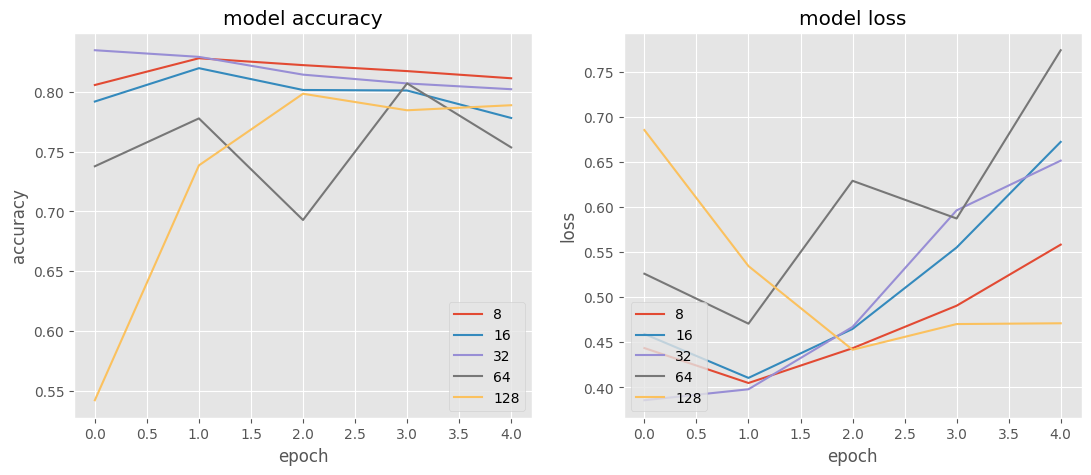

In [5]:
plt.style.use('ggplot')
fig, axis = plt.subplots(1, 2)
fig.set_size_inches(13, 5)

for k, history in history_dict.items():
    plt.sca(axis[0])
    plt.plot(history.history['val_accuracy'], label=k)
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(loc='lower right')

    plt.sca(axis[1])
    plt.plot(history.history['val_loss'], label=k)
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(loc='lower left')
plt.savefig(f'plots/'+ " ".join([str(x) for x in models.keys()]) + '.png');